In [87]:
import random
import numpy as np
import keras
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Concatenate, Dot, Lambda, Input
from keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [88]:
# load data
# 60000 images for 0-9 numbers
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalization
x_train /= 255
x_test /= 255

In [89]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


9

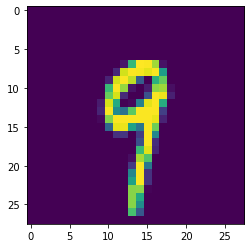

In [90]:
plt.imshow(x_train[600])
y_train[600]

In [91]:
# Separate similar samples from each class
y = y_train
num_classes = max(y) + 1
digit_indices = [np.where(y == i)[0] for i in range(num_classes)]
digit_indices

[array([    1,    21,    34, ..., 59952, 59972, 59987]),
 array([    3,     6,     8, ..., 59979, 59984, 59994]),
 array([    5,    16,    25, ..., 59983, 59985, 59991]),
 array([    7,    10,    12, ..., 59978, 59980, 59996]),
 array([    2,     9,    20, ..., 59943, 59951, 59975]),
 array([    0,    11,    35, ..., 59968, 59993, 59997]),
 array([   13,    18,    32, ..., 59982, 59986, 59998]),
 array([   15,    29,    38, ..., 59963, 59977, 59988]),
 array([   17,    31,    41, ..., 59989, 59995, 59999]),
 array([    4,    19,    22, ..., 59973, 59990, 59992])]

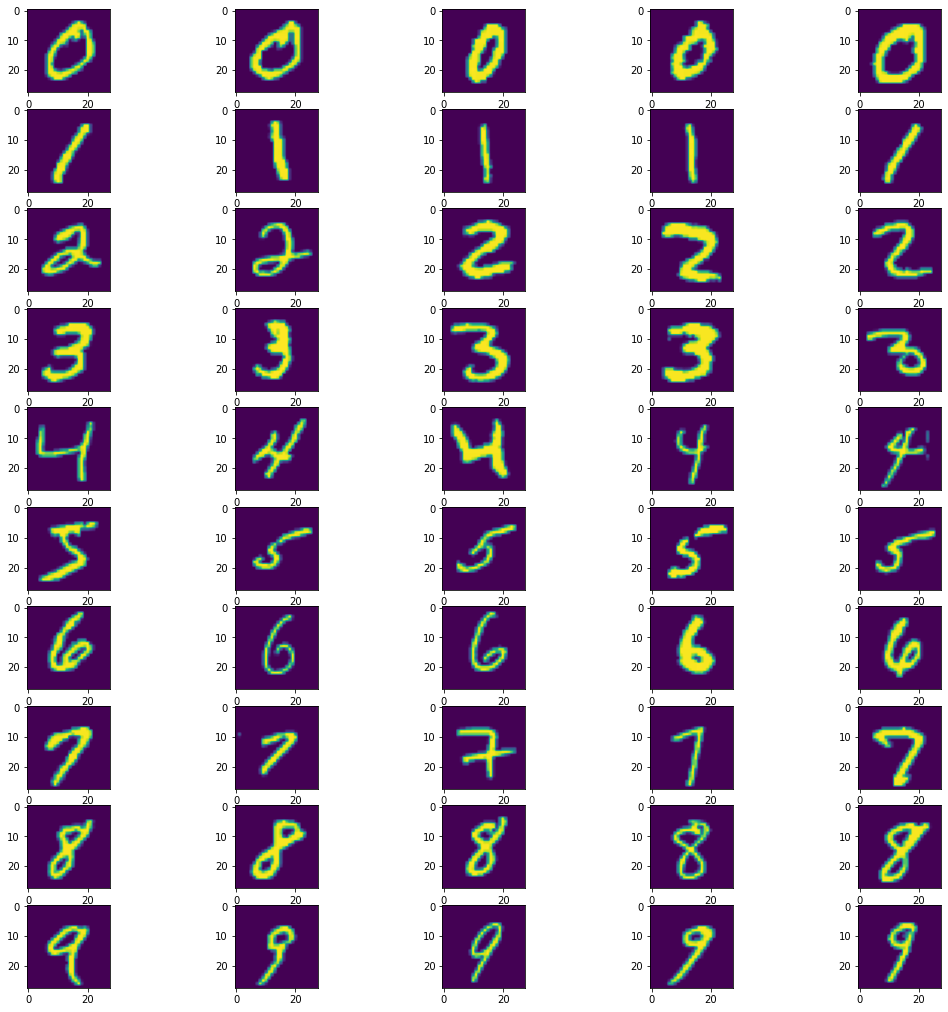

In [ ]:
img_number = 1
plt.figure(figsize=(18, 18))
for i in range(0, 10):
  for j in range(0, 5):
      plt.subplot(10, 5, img_number)
      plt.imshow(x_train[digit_indices[i][j]])
      img_number += 1
plt.show()

In [92]:
# make pairs
def make_pairs(x, y):
    """
    x: samples => 60000 images(28*28)=784
    y: labels  => 0-9
    """

    num_classes = max(y) + 1
    digit_indices = [np.where(y == i)[0] for i in range(num_classes)]

    pairs = []
    labels = [] # 0: same, 1: diffrent

    for idx1 in range(len(x)):
        # add a matching example
        x1 = x[idx1]
        label1 = y[idx1]
        idx2 = random.choice(digit_indices[label1])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [1]
    
        # add a not matching example
        label2 = random.randint(0, num_classes-1)
        while label2 == label1:
            label2 = random.randint(0, num_classes-1)

        idx2 = random.choice(digit_indices[label2])
        x2 = x[idx2]
        
        pairs += [[x1, x2]]
        labels += [0]

    return np.array(pairs), np.array(labels)

pairs_train, labels_train = make_pairs(x_train, y_train)
pairs_test, labels_test = make_pairs(x_test, y_test)

In [93]:
pairs_train.shape

(120000, 2, 28, 28)

In [94]:
labels_train.shape

(120000,)

In [95]:
labels_train

array([1, 0, 1, ..., 0, 1, 0])

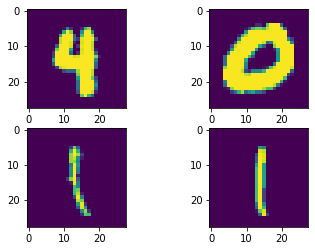

label:  0
label:  1


In [96]:
# take a peek at the data
plt.subplot(2, 2, 1)
plt.imshow(pairs_test[501][0])
plt.subplot(2, 2, 2)
plt.imshow(pairs_test[501][1])

plt.subplot(2, 2, 3)
plt.imshow(pairs_test[502][0])
plt.subplot(2, 2, 4)
plt.imshow(pairs_test[502][1])

plt.show()

print("label: ", labels_train[501])
print("label: ", labels_train[502])

In [97]:
# Weights not shared

seq1 = Sequential()
seq1.add(Flatten(input_shape=(28,28)))
seq1.add(Dense(128, activation='relu'))

seq2 = Sequential()
seq2.add(Flatten(input_shape=(28,28)))
seq2.add(Dense(128, activation='relu'))

merge_layer = Concatenate()([seq1.output, seq2.output])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[seq1.input, seq2.input], outputs=dense_layer)


In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 flatten_4_input (InputLayer)   [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_5_input (InputLayer)   [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_4 (Flatten)            (None, 784)          0           ['flatten_4_input[0][0]']        
                                                                                                  
 flatten_5 (Flatten)            (None, 784)          0           ['flatten_5_input[0][0]']        
                                                                                            

In [ ]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs= 10)

Epoch 1/10
7500/7500 [==============================] - 24s 3ms/step - loss: 0.6946 - accuracy: 0.5041
Epoch 2/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6932 - accuracy: 0.5063
Epoch 3/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6931 - accuracy: 0.5070
Epoch 4/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6928 - accuracy: 0.5137
Epoch 5/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6923 - accuracy: 0.5103
Epoch 6/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6918 - accuracy: 0.5147
Epoch 7/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6912 - accuracy: 0.5145
Epoch 8/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6905 - accuracy: 0.5185
Epoch 9/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6898 - accuracy: 0.5183
Epoch 10/10
7500/7500 [==============================] - 23s 3ms/step - l

In [ ]:
input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Concatenate()([dense1, dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [ ]:
model.compile(loss = "binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 input_9 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 model_6 (Functional)           (None, 128)          100480      ['input_8[0][0]',                
                                                                  'input_9[0][0]']                
                                                                                                  
 concatenate_3 (Concatenate)    (None, 256)          0           ['model_6[0][0]',          

In [ ]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6941 - accuracy: 0.5000
Epoch 2/10
7500/7500 [==============================] - 22s 3ms/step - loss: 0.6933 - accuracy: 0.5031
Epoch 3/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6929 - accuracy: 0.5159
Epoch 4/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6928 - accuracy: 0.5114
Epoch 5/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6925 - accuracy: 0.5168
Epoch 6/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6924 - accuracy: 0.5154
Epoch 7/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6922 - accuracy: 0.5190
Epoch 8/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.6919 - accuracy: 0.5243
Epoch 9/10
7500/7500 [==============================] - 22s 3ms/step - loss: 0.6916 - accuracy: 0.5192
Epoch 10/10
7500/7500 [==============================] - 22s 3ms/step - l

# Siamese neural network

In [98]:
from keras import backend as K

def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))


input = Input((28,28))
x = Flatten()(input)
x = Dense(128, activation='relu')(x)
dense = Model(input, x)

input1 = Input((28,28))
input2 = Input((28,28))

dense1 = dense(input1)
dense2 = dense(input2)

merge_layer = Lambda(euclidean_distance)([dense1,dense2])
dense_layer = Dense(1, activation="sigmoid")(merge_layer)
model = Model(inputs=[input1, input2], outputs=dense_layer)


In [99]:
model.compile(loss = "binary_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.summary()

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_20 (InputLayer)          [(None, 28, 28)]     0           []                               
                                                                                                  
 input_21 (InputLayer)          [(None, 28, 28)]     0           []                               
                                                                                                  
 model_15 (Functional)          (None, 128)          100480      ['input_20[0][0]',               
                                                                  'input_21[0][0]']               
                                                                                                  
 lambda_4 (Lambda)              (None, 1)            0           ['model_15[0][0]',        

In [100]:
model.fit([pairs_train[:,0], pairs_train[:,1]], labels_train[:], batch_size=16, epochs=10)

Epoch 1/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.5627 - accuracy: 0.7112
Epoch 2/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.3209 - accuracy: 0.8768
Epoch 3/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2575 - accuracy: 0.9015
Epoch 4/10
7500/7500 [==============================] - 28s 4ms/step - loss: 0.2323 - accuracy: 0.9109
Epoch 5/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2179 - accuracy: 0.9162
Epoch 6/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2081 - accuracy: 0.9205
Epoch 7/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.2007 - accuracy: 0.9234
Epoch 8/10
7500/7500 [==============================] - 24s 3ms/step - loss: 0.1945 - accuracy: 0.9258
Epoch 9/10
7500/7500 [==============================] - 23s 3ms/step - loss: 0.1897 - accuracy: 0.9274
Epoch 10/10
7500/7500 [==============================] - 23s 3ms/step - l

# Just for Test case


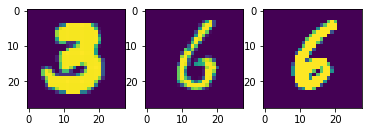

In [149]:
plt.subplot(1, 3, 1)
plt.imshow(x_test[200])
plt.subplot(1, 3, 2)
plt.imshow(x_test[50])
plt.subplot(1, 3, 3)
plt.imshow(x_test[197])
plt.show()

In [150]:
img1=np.expand_dims(x_test[200], axis=0)
img2=np.expand_dims(x_test[50], axis=0)
img3=np.expand_dims(x_test[197], axis=0)

In [151]:
print(model.predict([img1, img2]))
print(model.predict([img2, img3]))

[[0.00648327]]
[[0.9925442]]
